In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('../../data/banknotes.csv')

In [3]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
import seaborn as ss

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


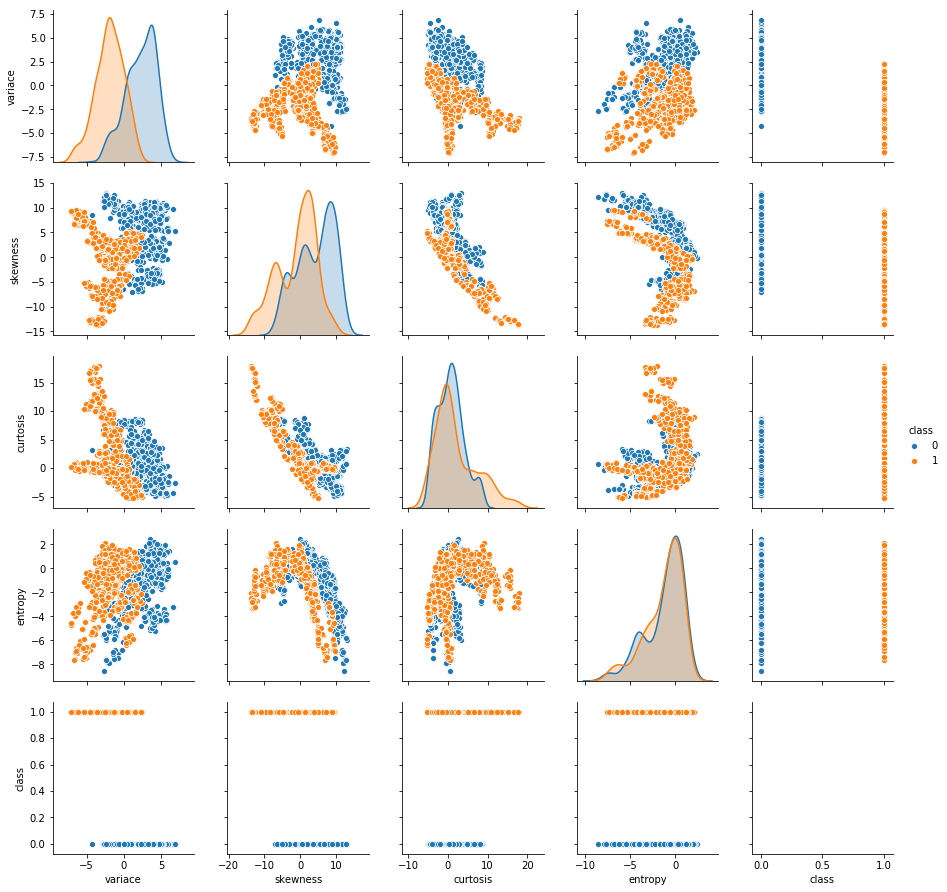

In [5]:
ss.pairplot(df, hue='class')

# Baseline model

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import scale

In [5]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [9]:
'''base line random classifier model'''

model = RandomForestClassifier()
cross_val_score(model, X,y)

array([0.99344978, 0.98905908, 0.99562363])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [3]:
import keras.backend as K
from keras import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


In [14]:
'''DNN model for binary classification'''

K.clear_session()
model = Sequential()
model.add(Dense(1,input_dim=4, activation='sigmoid'))
model.compile(SGD(lr=0.09), 'binary_crossentropy',metrics=['accuracy'])

info = model.fit(X_train, y_train, epochs=10)
results = model.evaluate(X_test, y_test)

Epoch 1/10
1097/1097 [==============================] - 0s 187us/step - loss: 0.3606 - acc: 0.9490
Epoch 2/10
1097/1097 [==============================] - 0s 47us/step - loss: 0.2675 - acc: 0.9699
Epoch 3/10
1097/1097 [==============================] - 0s 42us/step - loss: 0.2269 - acc: 0.9654
Epoch 4/10
1097/1097 [==============================] - 0s 47us/step - loss: 0.2021 - acc: 0.9654
Epoch 5/10
1097/1097 [==============================] - 0s 44us/step - loss: 0.1842 - acc: 0.9672
Epoch 6/10
1097/1097 [==============================] - 0s 47us/step - loss: 0.1703 - acc: 0.9690
Epoch 7/10
1097/1097 [==============================] - 0s 47us/step - loss: 0.1591 - acc: 0.9699
Epoch 8/10
1097/1097 [==============================] - 0s 45us/step - loss: 0.1497 - acc: 0.9699
Epoch 9/10
1097/1097 [==============================] - 0s 47us/step - loss: 0.1418 - acc: 0.9699
Epoch 10/10
275/275 [==============================] - 0s 182us/step


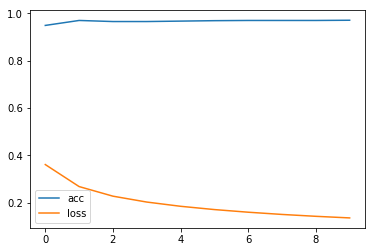

In [16]:
histdf = pd.DataFrame(info.history, index=info.epoch)
histdf.plot()

## Different learning rates 

In [11]:
'''finding the best learning rate'''

dflist=[]
lr=[0.01,0.05,0.1,0.5]

for l in lr:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1,input_dim=4, activation='sigmoid'))
    model.compile(SGD(lr=l), 'binary_crossentropy',metrics=['accuracy'])
    
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=10)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [12]:
all_hist = pd.concat(dflist, axis=1)

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.360985,0.877419,0.656335,0.606925,0.721057,0.562244,0.874202,0.311989
1,0.462170,0.739426,0.863263,0.368500,0.943482,0.292556,0.972653,0.120989
2,0.610757,0.641694,0.907931,0.294137,0.959891,0.219020,0.974476,0.090515
3,0.745670,0.571548,0.927074,0.252391,0.966272,0.179767,0.977211,0.076183
4,0.806746,0.519664,0.946217,0.223272,0.970830,0.154856,0.978122,0.067921
5,0.843209,0.479696,0.956244,0.201157,0.972653,0.137697,0.977211,0.062569
6,0.865087,0.447837,0.958979,0.183779,0.973564,0.125105,0.979034,0.058552
7,0.874202,0.421650,0.965360,0.169815,0.973564,0.115393,0.979945,0.055355
8,0.880583,0.399531,0.967183,0.158352,0.974476,0.107679,0.979945,0.053033
9,0.884230,0.380338,0.971741,0.148675,0.974476,0.101482,0.979945,0.050928


In [13]:
'''setting the indexes compatible for visualization'''
cols = dflist[0].columns
idx = pd.MultiIndex.from_product([lr, cols],names=['learning_rate', 'metric'])# form the porcudt form teh multilayer cols
all_hist.columns = idx

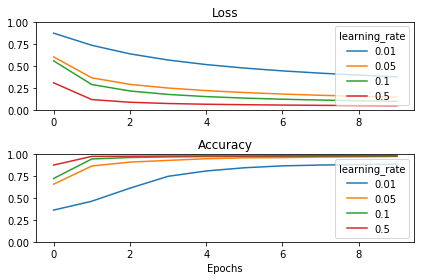

In [14]:
ax = plt.subplot(211)
all_hist.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
all_hist.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

# Batch Size

In [30]:
'''finding the best batch size for training a model'''

dflist=[]
batch_sizes=[16,32,64,128]

for bs in batch_sizes:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1,input_dim=4, activation='sigmoid'))
    model.compile(SGD(lr=l), 'binary_crossentropy',metrics=['accuracy'])
    
    h = model.fit(X_train, y_train, batch_size=bs, epochs=10)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
1097/1097 [==============================] - 0s 244us/step - loss: 0.2726 - acc: 0.9116
Epoch 2/10
1097/1097 [==============================] - 0s 84us/step - loss: 0.1172 - acc: 0.9690
Epoch 3/10
1097/1097 [==============================] - 0s 86us/step - loss: 0.0888 - acc: 0.9745
Epoch 4/10
1097/1097 [==============================] - 0s 81us/step - loss: 0.0752 - acc: 0.9790
Epoch 5/10
1097/1097 [==============================] - 0s 85us/step - loss: 0.0676 - acc: 0.9781
Epoch 6/10
1097/1097 [==============================] - 0s 89us/step - loss: 0.0622 - acc: 0.9790
Epoch 7/10
1097/1097 [==============================] - 0s 89us/step - loss: 0.0582 - acc: 0.9790
Epoch 8/10
1097/1097 [==============================] - 0s 88us/step - loss: 0.0551 - acc: 0.9790
Epoch 9/10
1097/1097 [==============================] - 0s 91us/step - loss: 0.0527 - acc: 0.9799
Epoch 10/10
1097/1097 [==============================] - 0s 91us/step - loss: 0.0508 - acc: 0.9799
Epoch 1/10
1097/10

In [33]:
all_hist = pd.concat(dflist, axis=1)
cols = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, cols],names=['batch_size', 'metric'])# form the porcudt form teh multilayer cols
all_hist.columns = idx

In [34]:
all_hist.head()

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.911577  0.272575  0.811304  0.406829  0.881495  0.357269   
1           0.969006  0.117209  0.952598  0.192664  0.937101  0.227954   
2           0.974476  0.088766  0.969918  0.136686  0.958067  0.177240   
3           0.979034  0.075191  0.970830  0.110952  0.968095  0.148512   
4           0.978122  0.067570  0.974476  0.095828  0.969006  0.129637   

batch_size       128            
metric           acc      loss  
0           0.804011  0.464964  
1           0.958979  0.251088  
2           0.959891  0.202811  
3           0.964448  0.177716  
4           0.968095  0.160246

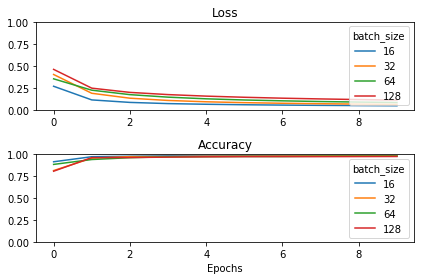

In [35]:
'''batch sizes performance visualization'''

ax = plt.subplot(211)
all_hist.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
all_hist.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

# Optimizers

In [15]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [16]:
'''Optimial optimizer for classification'''

dflist=[]
optimizers=['SGD(lr=0.01)', 'SGD(lr=0.01, momentum=.3)','SGD(lr=0.01, momentum=.3, nesterov=True)'
           , 'Adam(lr=0.01)','Adagrad(lr=0.01)','RMSprop(lr=0.01)']

for opt in optimizers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1,input_dim=4, activation='sigmoid'))
    model.compile(optimizer=eval(opt), loss='binary_crossentropy',metrics=['accuracy'])
    
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    

In [17]:
all_hist = pd.concat(dflist, axis=1)
cols = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, cols],names=['optimizer', 'metric'])# form the porcudt form teh multilayer cols
all_hist.columns = idx

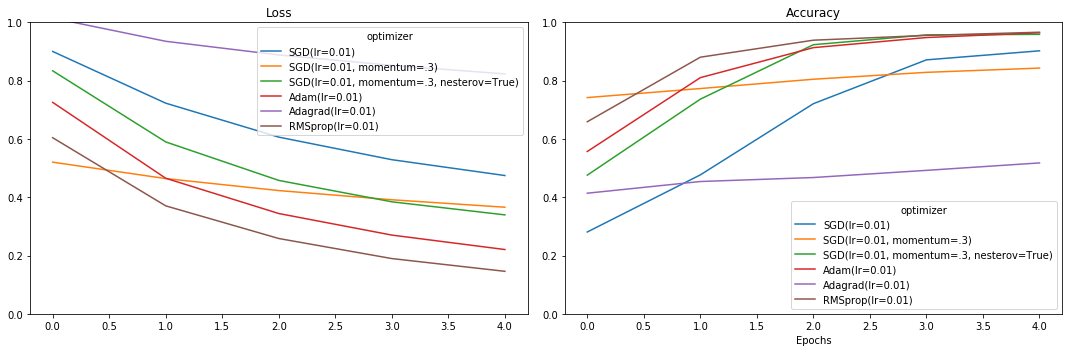

In [23]:
'''Optimizers performance visualization'''

plt.figure(figsize=(15,5))
ax = plt.subplot(121)
all_hist.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(122)
all_hist.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

# Weights initilizations

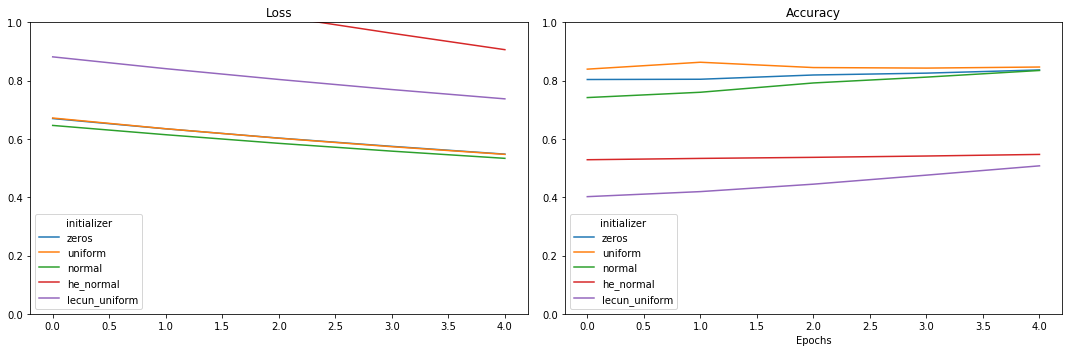

In [24]:
'''evaluating different weight initializations for efficiency improvement'''


dflist=[]
initializers=['zeros', 'uniform', 'normal', 'he_normal','lecun_uniform']

for init in initializers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1,input_dim=4, kernel_initializer=init, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
    
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    

all_hist = pd.concat(dflist, axis=1)
cols = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, cols],names=['initializer', 'metric'])# form the porcudt form teh multilayer cols
all_hist.columns = idx

plt.figure(figsize=(15,5))

ax = plt.subplot(121)
all_hist.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(122)
all_hist.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.tight_layout()

In [11]:
# The models are sensitive to the initial weights

# INNER LAYER VISUALIZATION

In [ ]:
'''Typical Neural Network'''

K.clear_session()

K.clear_session()
model = Sequential()
model.add(Dense(2,input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(RMSprop(lr=0.05), 'binary_crossentropy',metrics=['accuracy'])
              
h = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.1, verbose=0)
result  = model.evaluate(X_test, y_test)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
'''estimating from the inner layer learned parameters'''

inp = model.layers[0].input
out = model.layers[0].output

In [26]:
feature_function=K.function([inp], [out])
features_after_layer_1 = feature_function([X_test])[0]

In [27]:
features_after_layer_1.shape

(275, 2)

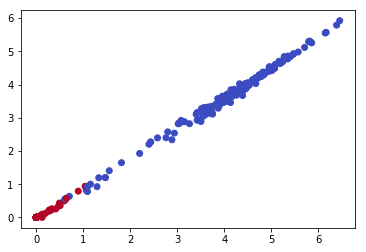

In [28]:
'''estimation based on the inner layer weights'''

plt.scatter(features_after_layer_1[:,0], features_after_layer_1[:,1], c=y_test, cmap='coolwarm')

In [29]:
'''Estimation from a deeper neural network classification'''

K.clear_session()

K.clear_session()
model = Sequential()
model.add(Dense(3,input_dim=4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(RMSprop(lr=0.05), 'binary_crossentropy',metrics=['accuracy'])

In [31]:
inp = model.layers[0].input
out = model.layers[1].output

feature_function=K.function([inp], [out])

Epoch 1/1
275/275 [==============================] - 0s 46us/step
Epoch 1/1
275/275 [==============================] - 0s 40us/step
Epoch 1/1
275/275 [==============================] - 0s 22us/step
Epoch 1/1
275/275 [==============================] - 0s 46us/step
Epoch 1/1
275/275 [==============================] - 0s 24us/step
Epoch 1/1
275/275 [==============================] - 0s 59us/step
Epoch 1/1
275/275 [==============================] - 0s 22us/step
Epoch 1/1
275/275 [==============================] - 0s 33us/step
Epoch 1/1
275/275 [==============================] - 0s 32us/step
Epoch 1/1
275/275 [==============================] - 0s 61us/step
Epoch 1/1
275/275 [==============================] - 0s 70us/step
Epoch 1/1
275/275 [==============================] - 0s 35us/step
Epoch 1/1
275/275 [==============================] - 0s 27us/step
Epoch 1/1
275/275 [==============================] - 0s 32us/step
Epoch 1/1
275/275 [==============================] - 0s 27us/step
Epoch 1/1


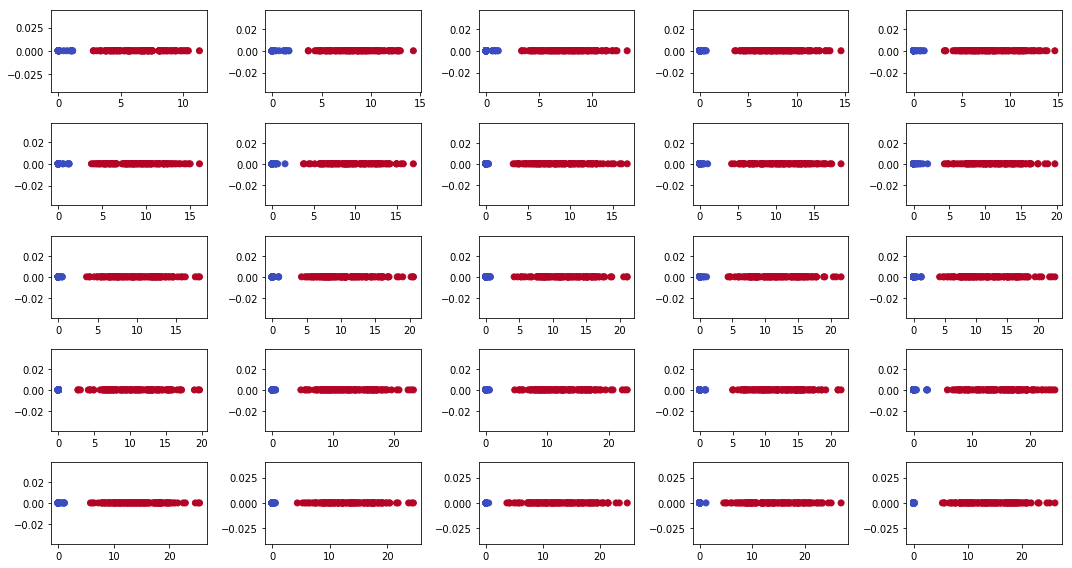

In [34]:
'''visualization of learned features from inner layers'''

plt.figure(figsize=(15,8))

for i in range(1,26):
    plt.subplot(5,5,i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1)
    accuracy = model.evaluate(X_test, y_test)[1]
    features = feature_function([X_test])[0]
    plt.scatter(features[:,0], features[:,1], c= y_test, cmap='coolwarm')

    plt.tight_layout()